In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from typing import List, Tuple

In [70]:
data = pd.read_csv('train.csv')
data.drop(columns=['Id'], inplace=True)

In [71]:
cat_vars = [var for var in data.columns if data[var].dtype == 'O'] + ['MSSubClass']
num_vars = [var for var in data.columns if var not in cat_vars and var != 'SalePrice']

In [72]:
data[cat_vars] = data[cat_vars].astype('O')

In [73]:
print(f" number of categorical columns {len(cat_vars)}")
print(f" number of numeric columns {len(num_vars)}")

 number of categorical columns 44
 number of numeric columns 35


In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

### Distribution of target variable
* logrithm transformation of target variable to make it have a normal distribution

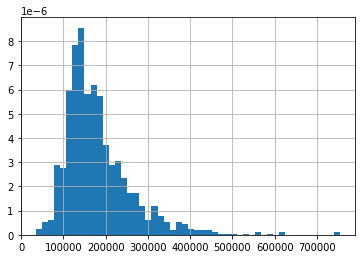

In [75]:
data['SalePrice'].hist(bins=50, density=True)
plt.xlab = 'Sale Price'
plt.ylab = "number of houses"

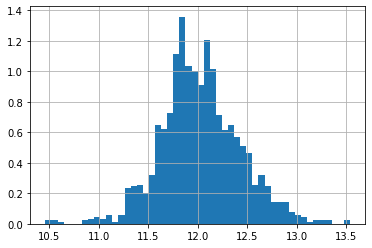

In [76]:
np.log(data['SalePrice']).hist(bins=50, density=True)
plt.xlab = 'Sale Price'
plt.ylab = "number of houses"

In [77]:
vars_with_na = [var for var in data.columns if data[var].isnull().sum() > 0]
len(vars_with_na)

19

In [78]:
cat_na = [var for var in cat_vars if var in vars_with_na]
num_na = [var for var in num_vars if var in vars_with_na]

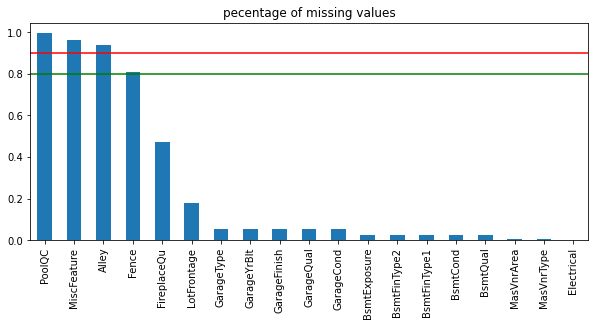

In [79]:
data[vars_with_na].isnull().mean().sort_values(ascending=False).plot.bar(figsize = (10,4))
plt.title('pecentage of missing values')
plt.axhline(y=0.9, color='r', linestyle = "-")
plt.axhline(y=0.8, color='g', linestyle = "-")

C:\Users\HuangY07\AppData\Roaming\Python\Python310\site-packages\numpy\core\_methods.py:45: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
C:\Users\HuangY07\AppData\Roaming\Python\Python310\site-packages\numpy\core\_methods.py:41: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


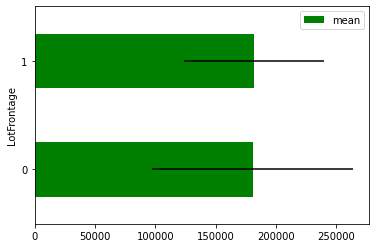

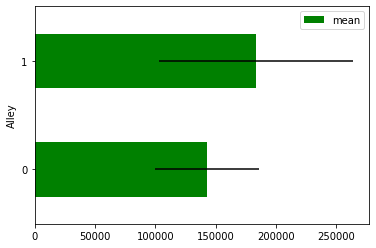

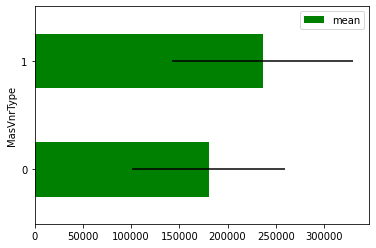

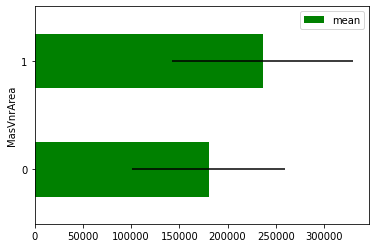

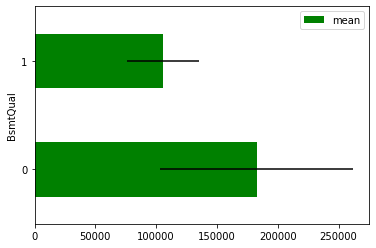

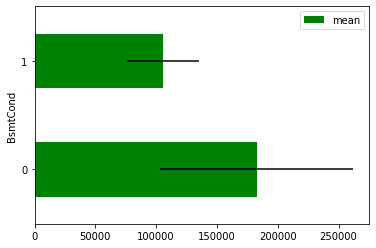

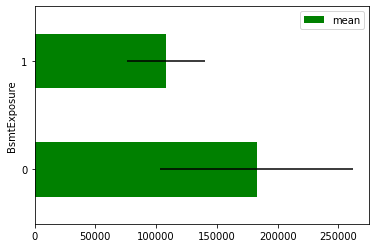

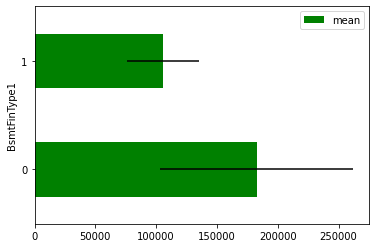

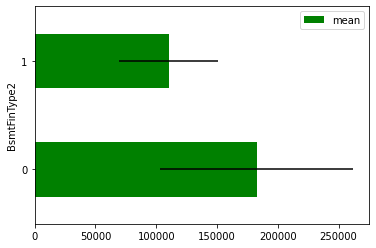

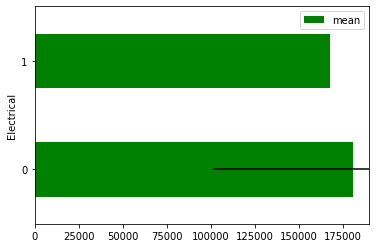

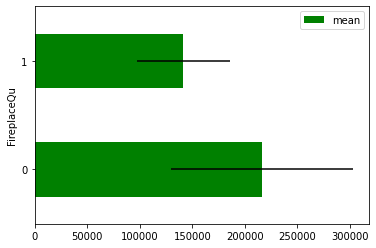

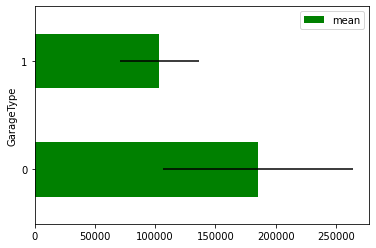

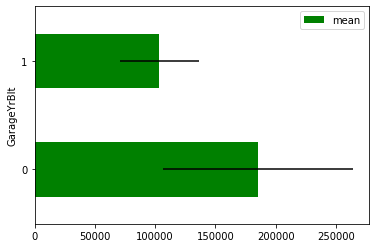

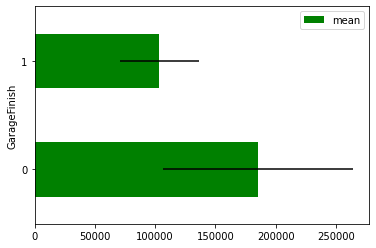

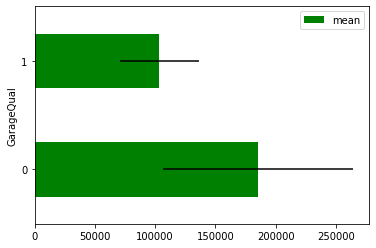

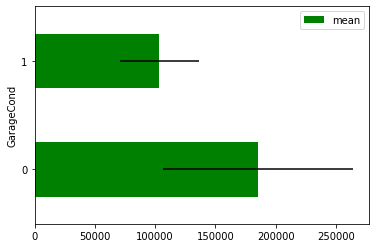

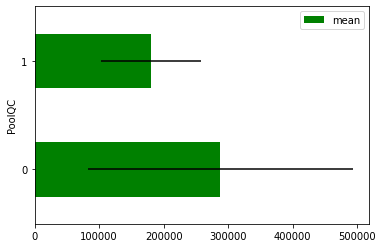

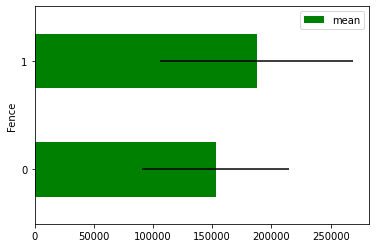

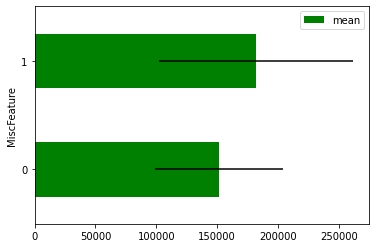

In [89]:
for var in vars_with_na:
    d = data.copy()
    
    d[var] = np.where(d[var].isnull(), 1, 0)
    tmp = d.groupby(var)['SalePrice'].agg(["mean", "std"])
    tmp.plot(kind="barh", y = "mean", xerr = "std", color="green")

In [106]:
# plot if missing value and valid value have different target value distribution
def analyze_na_value(df, vars) -> None:
    # copy of the dataframe, so that we do not override the original data
    # see the link for more details about pandas.copy()
    # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.copy.html
    df = df.copy()

    # let's make an interim variable that indicates 1 if the
    # observation was missing or 0 otherwise
    for var in vars:        
        df[var] = np.where(df[var].isnull(), 1, 0)

        # let's compare the median SalePrice in the observations where data is missing
        # vs the observations where data is available

        # determine the median price in the groups 1 and 0,
        # and the standard deviation of the sale price,
        # and we capture the results in a temporary dataset
        tmp = df.groupby(var)['SalePrice'].agg(['mean', 'std'])
        print(tmp)

        # plot into a bar graph
        tmp.plot(kind="barh", y="mean", legend=False,
                 xerr="std", title="Sale Price", color='green')



                      mean           std
LotFrontage                             
0            180770.480433  83389.519866
1            181620.073359  57841.775706
                mean           std
Alley                             
0      142845.912088  42867.137343
1      183452.131483  80667.145180
                     mean           std
MasVnrType                             
0           180615.063361  79285.541485
1           236484.250000  93964.474968
                     mean           std
MasVnrArea                             
0           180615.063361  79285.541485
1           236484.250000  93964.474968
                   mean           std
BsmtQual                             
0         182878.277583  79387.526888
1         105652.891892  29278.694797
                   mean           std
BsmtCond                             
0         182878.277583  79387.526888
1         105652.891892  29278.694797
                       mean           std
BsmtExposure                  

C:\Users\HuangY07\AppData\Roaming\Python\Python310\site-packages\numpy\core\_methods.py:45: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
C:\Users\HuangY07\AppData\Roaming\Python\Python310\site-packages\numpy\core\_methods.py:41: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


                 mean            std
PoolQC                              
0       288138.571429  206071.850935
1       180404.663455   78168.872519
                mean           std
Fence                             
0      152912.007117  62113.736323
1      187596.837998  81656.497075
                      mean           std
MiscFeature                             
0            151623.944444  52996.542694
1            182046.410384  80084.136570


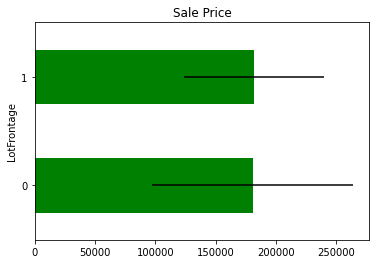

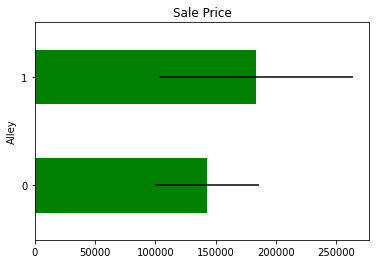

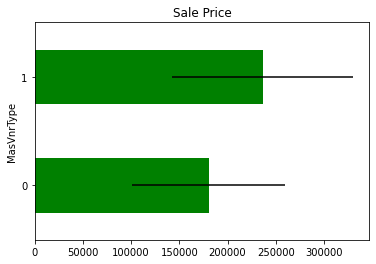

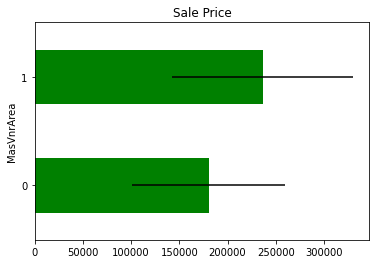

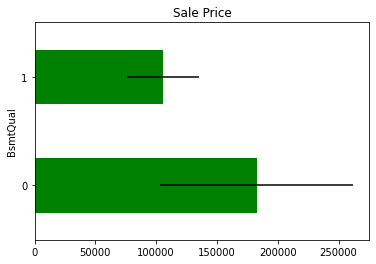

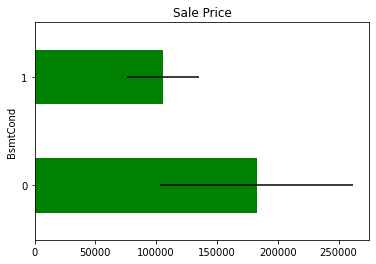

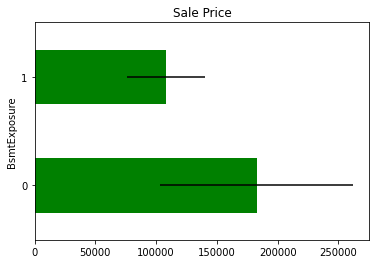

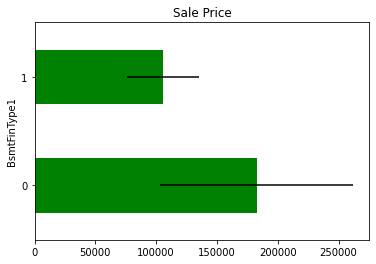

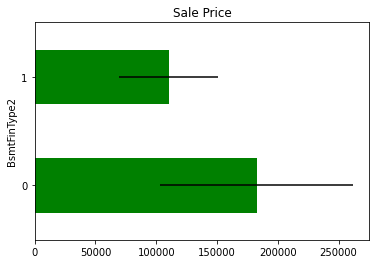

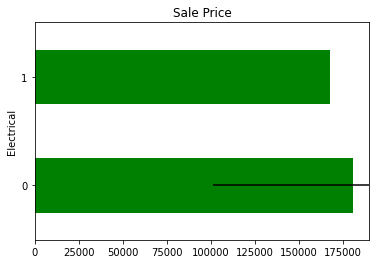

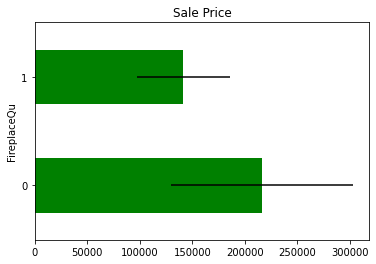

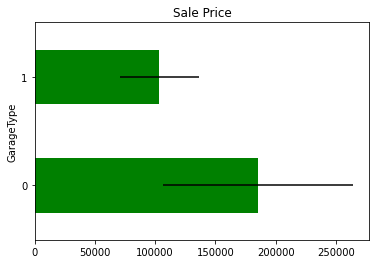

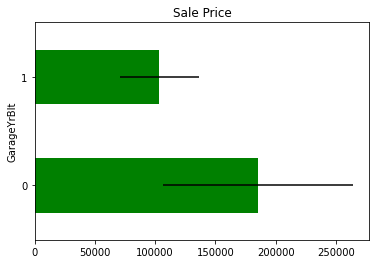

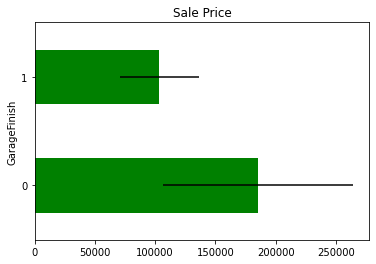

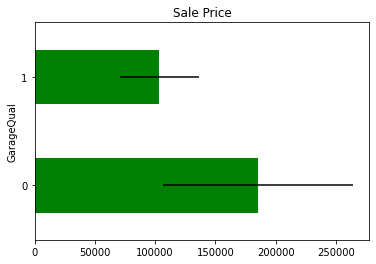

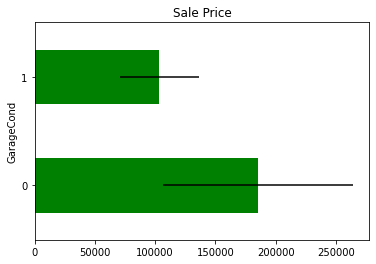

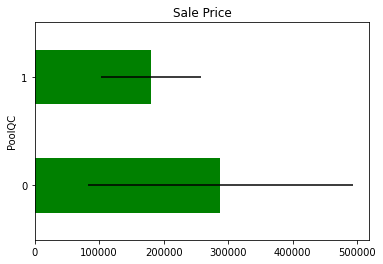

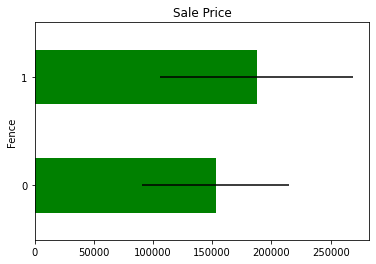

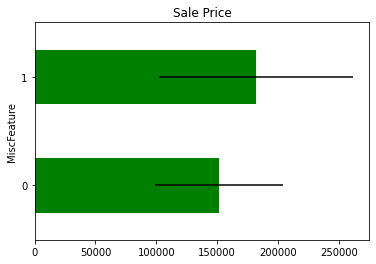

In [107]:
analyze_na_value(data, vars_with_na)

In [102]:
year_vars = [var for var in num_vars if 'Yr' in var or 'Year' in var]
year_vars

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

<AxesSubplot:xlabel='YrSold'>

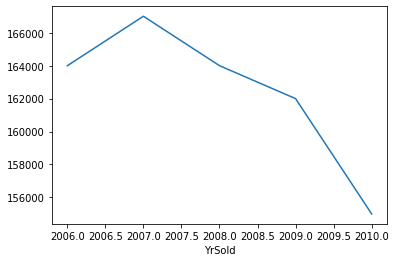

In [105]:
data.groupby('YrSold')['SalePrice'].median().plot()

In [108]:
data.shape

(1460, 80)

In [109]:
test = pd.read_csv("test.csv")

In [110]:
tmp = pd.concat([data, test], axis = 1)

In [111]:
tmp.shape

(1460, 160)